In [9]:
import torch     
import torch.nn as nn    
import torch.optim as optim    
import matplotlib.pyplot as plt

In [17]:
#sample sentences and preprocessing 
sentences=["We are studying the CBOW model","CBOW stands for Continuous Bag of Words"]
words=" ".join(sentences).lower().split()
vocab=set(words)
word_to_ix={word: i for  i, word in  enumerate(vocab)}
ix_to_word={i:word for word ,i in word_to_ix.items()}
vocab_size=len(vocab)
context_size=2
embed_dim=10

#Create context-target pairs
data=[]
for i in range(context_size,len(words) -context_size):
    context=[words[i-2],words[i-1],words[i+1],words[i+2]]
    target=words[i]
    data.append((context,target))
print(word_to_ix)

{'the': 0, 'model': 1, 'stands': 2, 'continuous': 3, 'bag': 4, 'are': 5, 'cbow': 6, 'studying': 7, 'of': 8, 'for': 9, 'we': 10, 'words': 11}


In [11]:
class CBOW(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embed_dim)
        self.linear1 = nn.Linear(2 * context_size * embed_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, context_idxs):
        embeds = self.embeddings(context_idxs).view(1, -1)
        out = torch.relu(self.linear1(embeds))
        out = self.linear2(out)
        return out

In [12]:
model = CBOW(vocab_size, embed_dim=10)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_values = []  # Initialize this outside the loop to accumulate values across epochs
# Training loop
for epoch in range(50):
    total_loss = 0
  
    for context, target in data:
        # Convert context and target words to tensor indices
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        target_idx = torch.tensor([word_to_ix[target]], dtype=torch.long)

        # Forward pass
        optimizer.zero_grad()  # Clear the gradients
        output = model(context_idxs)  # Predict output
        loss = loss_function(output, target_idx)  # Calculate loss
  # Calculate loss

        # Automatic backward propagation and weight update
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        # Calculate and store the average loss for this epoch
    average_loss = total_loss / len(data)
    loss_values.append(average_loss)

    # Print loss every 10 epochs for monitoring
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss}")

Epoch 0, Loss: 22.44996190071106
Epoch 10, Loss: 7.107532024383545
Epoch 20, Loss: 2.140383705496788
Epoch 30, Loss: 0.9899765104055405
Epoch 40, Loss: 0.5989576131105423


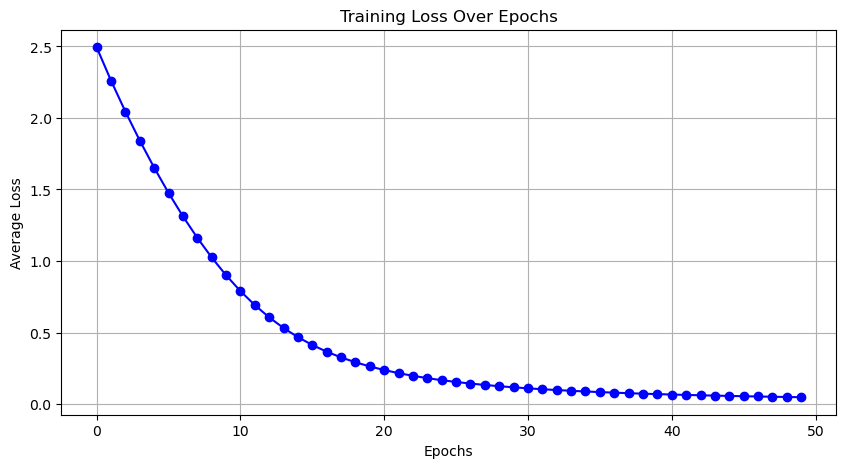

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(loss_values)), loss_values, marker='o', color='b')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.grid(True)
plt.show()


In [18]:
def predict(context):
    context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
    with torch.no_grad():
        output = model(context_idxs)
        predicted_idx = output.argmax().item()
    return ix_to_word[predicted_idx]

# Test prediction
print(predict(["cbow", "stands", "for", "continuous"]))  # Example prediction


for


In [15]:


# Accuracy calculation

def accuracy():
    return sum(predict(context) == target for context, target in data) / len(data)

In [16]:
print(accuracy())

1.0
